<a href="https://colab.research.google.com/github/pgkramer/portfolio/blob/master/Dog_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, show
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Overview
The purpose of this exercise is to demonstrate my ability to clean, interpret, and visualize a dataset. 



####Data Synopsis
All dog owners residing in NYC are required by law to license their dogs. The data is sourced from the DOHMH Dog Licensing System (https://a816-healthpsi.nyc.gov/DogLicense), where owners can apply for and renew dog licenses. Each record stands as a unique license period for a dog over the course of the yearlong time frame. For more information, see: https://data.cityofnewyork.us/d/nu7n-tubp


In [0]:
dog_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dog_data.csv")

In [4]:
dog_data.head()

,rownumber,animalname,animalgender,breedname,borough,statesenatorialdistrict
0,1753,SHADOW,M,Beagle,Brooklyn,19.0
1,2415,ROCCO,M,Boxer,Brooklyn,17.0
2,3328,LUIGI,M,Maltese,Bronx,34.0
3,7537,PETUNIA,F,Pug,Brooklyn,18.0
4,8487,ROMEO,M,Maltese,Bronx,32.0


In [0]:
#Convert observations to title case 
dog_data["animalname"] = dog_data["animalname"].str.title()
dog_data['borough'] = dog_data['borough'].str.title()

In [6]:
dog_data.dtypes

rownumber                    int64
animalname                  object
animalgender                object
breedname                   object
borough                     object
statesenatorialdistrict    float64
dtype: object

In [7]:
#Find missing values

dog_data.isnull().sum()

rownumber                     0
animalname                  246
animalgender                  5
breedname                     0
borough                       0
statesenatorialdistrict    2895
dtype: int64

In [0]:
#Drop null values and reset index
dog_data.dropna(inplace=True)
dog_data.isnull().sum()
dog_data.reset_index(inplace=True)

In [0]:
#Convert senatorial district to integer, rename columns for legibility 
dog_data.statesenatorialdistrict = dog_data.statesenatorialdistrict.astype(int)
dog_data.rename(columns={'rownumber':'row','animalname':'name', 'animalgender': 'gender','breedname':'breed','statesenatorialdistrict':'district'}, inplace=True)

In [10]:
print("There are {} observations and {} features in this dataset. \n".format(dog_data.shape[0],dog_data.shape[1]))

print("There are {} types of dogs in this dataset such as {}... \n".format(len(dog_data.breed.unique()),
                                                                           ", ".join(dog_data.breed.unique()[0:5])))

print("There are {} unique dog names in this dataset such as {}... \n".format(len(dog_data.name.unique()),
                                                                                      ", ".join(dog_data.name.unique()[0:5])))

There are 102050 observations and 7 features in this dataset. 

There are 298 types of dogs in this dataset such as Beagle, Boxer, Maltese, Pug, Chihuahua... 

There are 15121 unique dog names in this dataset such as Shadow, Rocco, Luigi, Petunia, Romeo... 



In [11]:
dog_data.head()

,index,row,name,gender,breed,borough,district
0,0,1753,Shadow,M,Beagle,Brooklyn,19
1,1,2415,Rocco,M,Boxer,Brooklyn,17
2,2,3328,Luigi,M,Maltese,Bronx,34
3,3,7537,Petunia,F,Pug,Brooklyn,18
4,4,8487,Romeo,M,Maltese,Bronx,32


In [12]:
#Looks like many did not include the dog's name, but the most popular of the ones that did are "Bella", "Max", and "Charlie" 
dog_data['name'].value_counts()

Unknown              2238
Name Not Provided    1498
Bella                1125
Max                  1049
Charlie               833
                     ... 
Bowey                   1
Splashy                 1
Fiolry                  1
Shabby                  1
Jaxsyn                  1
Name: name, Length: 15121, dtype: int64

In [13]:
#The borough data is challenging to work with. Will rename the "Staten Is" cases to "Staten Island" and drop the rest as outliers. 
dog_data['borough'].value_counts()

Manhattan             36006
Brooklyn              25500
Queens                20669
Bronx                 10667
Staten Island          8914
Staten Is               198
New York                 49
Astoria                   4
Jackson Heights           3
Kew Gardens               3
Elmhurst                  3
Flushing                  3
Briarwood                 2
Rockaway Park             2
Ozone Park                2
Corona                    2
Woodside                  2
Fresh Meadows             2
Glendale                  1
College Point             1
Bayside                   1
Ridgewood                 1
Forest Hills              1
Arverne                   1
Quens                     1
Nyc                       1
Woodside Ny.              1
Long Island City          1
Staten Island, Ny         1
B                         1
East Elmhurst             1
South Richmond Hil        1
Oakland Gardens           1
Richmond Hill             1
Glen Oaks                 1
Floral Park         

In [17]:
dog_data['borough'].replace({'Staten Is': 'Staten Island'})

0              Brooklyn
1              Brooklyn
2                 Bronx
3              Brooklyn
4                 Bronx
              ...      
102045           Queens
102046        Manhattan
102047         Brooklyn
102048    Staten Island
102049            Bronx
Name: borough, Length: 102050, dtype: object

In [0]:
fiveboroughs = ['Brooklyn','Manhattan', 'Bronx', 'Staten Island','Queens']
dog_data = dog_data[dog_data.borough.isin(fiveboroughs)]

In [37]:
dog_data['borough'].value_counts()

Manhattan        36006
Brooklyn         25500
Queens           20669
Bronx            10667
Staten Island     8914
Name: borough, dtype: int64

In [0]:
names = dog_data['name']
genders = dog_data['gender']
breeds = dog_data['breed']
boroughs = dog_data['borough']
districts = dog_data['district']

AttributeError: ignored

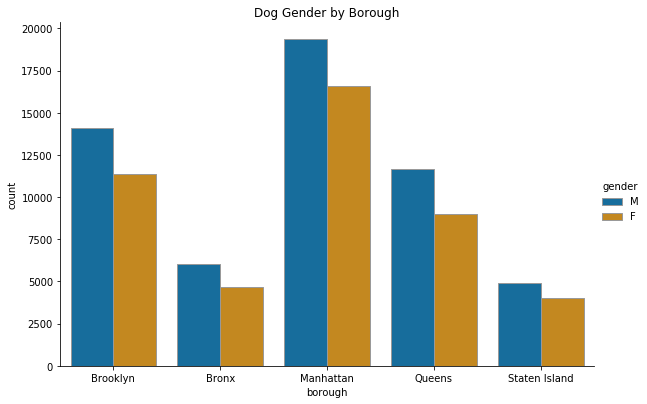

In [57]:
#Plotting a distribution of dog genders by borough 

sns.catplot(x="borough", hue="gender", kind="count",
            palette="colorblind", edgecolor=".6",  height=5.5, aspect=1.5,
            data=dog_data)
plt.title("Dog Gender by Borough")